In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sk

In [165]:
from pandas import json_normalize

In [166]:
import json

file_path = 'result.json'


with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)


df = json_normalize(
    data, 
    record_path='text_entities',
    meta=['id', 'type', 'date', 'date_unixtime', 'actor', 'actor_id', 'action', 'inviter', 'text'],
    record_prefix='entity_',
    errors='ignore',
)


In [167]:
df.shape

(18005, 15)

In [168]:
df

,entity_type,entity_text,entity_href,entity_document_id,entity_collapsed,entity_user_id,id,type,date,date_unixtime,actor,actor_id,action,inviter,text
0,plain,Никто половину арбуза забрать не хочет?,NaN,NaN,NaN,NaN,27,message,2021-07-28T13:54:41,1627469681,NaN,NaN,NaN,NaN,Никто половину арбуза забрать не хочет?
1,plain,UPD: забрали,NaN,NaN,NaN,NaN,28,message,2021-07-28T13:58:50,1627469930,NaN,NaN,NaN,NaN,UPD: забрали
2,plain,какой корпус?,NaN,NaN,NaN,NaN,68,message,2021-07-30T16:13:40,1627650820,NaN,NaN,NaN,NaN,какой корпус?
3,plain,"Молодые и красивые, буду рада отдать в добрые ...",NaN,NaN,NaN,NaN,92,message,2021-08-03T13:29:33,1627986573,NaN,NaN,NaN,NaN,"Молодые и красивые, буду рада отдать в добрые ..."
4,plain,"1к, уехала, оставила у двери страчателлу и ост...",NaN,NaN,NaN,NaN,114,message,2021-08-05T17:39:14,1628174354,NaN,NaN,NaN,NaN,"1к, уехала, оставила у двери страчателлу и ост..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18000,plain,сито большое бронь,NaN,NaN,NaN,NaN,32824,message,2025-09-20T09:02:20,1758348140,NaN,NaN,NaN,NaN,сито большое бронь
18001,plain,сито поменбше бронь,NaN,NaN,NaN,NaN,32825,message,2025-09-20T09:05:58,1758348358,NaN,NaN,NaN,NaN,сито поменбше бронь
18002,plain,Венчик бронь,NaN,NaN,NaN,NaN,32826,message,2025-09-20T09:08:36,1758348516,NaN,NaN,NaN,NaN,Венчик бронь
18003,plain,друзья мб кому нибудь нужны банки жалко выкиды...,NaN,NaN,NaN,NaN,32827,message,2025-09-20T09:19:20,1758349160,NaN,NaN,NaN,NaN,друзья мб кому нибудь нужны банки жалко выкиды...


In [169]:
df = df[df['entity_text'].notna() & (df['entity_text'] != '')]

In [170]:
df = df[["entity_text", "date", "text"]]

 - сколько спама
 - сколько объявлений по объявлению
 - сколько объявлений по забоу
 - в скольких говорится что забрали
 - в скольких объявлениях упоминается срок годности
 - в скольких упоминается корпус

In [171]:
df

,entity_text,date,text
0,Никто половину арбуза забрать не хочет?,2021-07-28T13:54:41,Никто половину арбуза забрать не хочет?
1,UPD: забрали,2021-07-28T13:58:50,UPD: забрали
2,какой корпус?,2021-07-30T16:13:40,какой корпус?
3,"Молодые и красивые, буду рада отдать в добрые ...",2021-08-03T13:29:33,"Молодые и красивые, буду рада отдать в добрые ..."
4,"1к, уехала, оставила у двери страчателлу и ост...",2021-08-05T17:39:14,"1к, уехала, оставила у двери страчателлу и ост..."
...,...,...,...
18000,сито большое бронь,2025-09-20T09:02:20,сито большое бронь
18001,сито поменбше бронь,2025-09-20T09:05:58,сито поменбше бронь
18002,Венчик бронь,2025-09-20T09:08:36,Венчик бронь
18003,друзья мб кому нибудь нужны банки жалко выкиды...,2025-09-20T09:19:20,друзья мб кому нибудь нужны банки жалко выкиды...


In [172]:
df["keywords"] = ""

In [173]:
import re
import pandas as pd

def clean_message(row):
    raw_text = row.get("text", "")
    if not isinstance(raw_text, str):
        raw_text = str(raw_text)

    raw_entity = row.get("entity_text", "")
    if not isinstance(raw_entity, str):
        raw_entity = str(raw_entity)


    cleaned_text = re.sub(r'[^\w\s]', ' ', raw_text).lower().strip()
    cleaned_entity = re.sub(r'[^\w\s]', ' ', raw_entity).lower().strip()


    row["text"] = cleaned_text
    row["entity_text"] = cleaned_entity
    row["keywords"] = cleaned_text.split()

    return row

In [174]:
df = df.apply(clean_message, axis=1)

In [175]:
df

,entity_text,date,text,keywords
0,никто половину арбуза забрать не хочет,2021-07-28T13:54:41,никто половину арбуза забрать не хочет,"[никто, половину, арбуза, забрать, не, хочет]"
1,upd забрали,2021-07-28T13:58:50,upd забрали,"[upd, забрали]"
2,какой корпус,2021-07-30T16:13:40,какой корпус,"[какой, корпус]"
3,молодые и красивые буду рада отдать в добрые ...,2021-08-03T13:29:33,молодые и красивые буду рада отдать в добрые ...,"[молодые, и, красивые, буду, рада, отдать, в, ..."
4,1к уехала оставила у двери страчателлу и ост...,2021-08-05T17:39:14,1к уехала оставила у двери страчателлу и ост...,"[1к, уехала, оставила, у, двери, страчателлу, ..."
...,...,...,...,...
18000,сито большое бронь,2025-09-20T09:02:20,сито большое бронь,"[сито, большое, бронь]"
18001,сито поменбше бронь,2025-09-20T09:05:58,сито поменбше бронь,"[сито, поменбше, бронь]"
18002,венчик бронь,2025-09-20T09:08:36,венчик бронь,"[венчик, бронь]"
18003,друзья мб кому нибудь нужны банки жалко выкиды...,2025-09-20T09:19:20,друзья мб кому нибудь нужны банки жалко выкиды...,"[друзья, мб, кому, нибудь, нужны, банки, жалко..."


In [176]:
df.shape

(17841, 4)

In [177]:

keywords_sell = set([
    "отдам", "отдаю", "предложу", "предлагаю", "поделюсь", "раздам", "раздаю",
    "есть лишнее", "осталось", "досталось", "в наличии", "заберите", "угощу",
    "оставила", "оставлю", "у двери", "возьмите", "кому надо", "кому нужно",
    "кому", "все еще есть", "осталась", "отдал", "отдалась", "отдала",
    "upd", "апдейт", "апд", "бесплатно", "даром", "за просто так", "безвозмездно",
    "передам", "продам", "продаю", "бронь", "бронь за кем", "забронировано",
    "поставила", "положила", "в контейнере", "в подъезде", "под дверью"
])

keywords_buy = set([
    "заберу", "возьму", "взял бы", "беру", "готов взять", "есть ли", "ищу",
    "можно", "можно мне", "кому не нужно", "пригодится", "нужен", "нужна", "нужно",
    "хочу", "можно забрать", "подскажите", "осталось ли", "забрал бы", "ищется",
    "было бы здорово", "приеду", "забегу", "никто не отдаёт", "не осталось ли", 
    "бронь", "бронирую", "забронирую"
])

keywords_age = set(["срок", "давно", "вчерашнее", "недавнее", "свежее", "просрочено", "просрочка"])
keywords_house = set(["корпус", "к", "1к", "2к", "3к", "парадная", "подъезд", "этаж", "дверь"])
keywords_already_taken = set(["уже", "забрали", "отбой", "нету", "съели", "забронировано", "забрали уже"])



def has_any(tokens, keyword_set):
    return any(token in keyword_set for token in tokens)


df["is_sell"] = df["keywords"].apply(lambda tokens: has_any(tokens, keywords_sell))
df["is_buy"] = df["keywords"].apply(lambda tokens: has_any(tokens, keywords_buy))
df["is_age_related"] = df["keywords"].apply(lambda tokens: has_any(tokens, keywords_age))
df["is_house_related"] = df["keywords"].apply(lambda tokens: has_any(tokens, keywords_house))
df["is_already_taken"] = df["keywords"].apply(lambda tokens: has_any(tokens, keywords_already_taken))

posts_sell = df[df["is_sell"]]
posts_buy = df[df["is_buy"]]
posts_age = df[df["is_age_related"]]
posts_house = df[df["is_house_related"]]
posts_already_taken = df[df["is_already_taken"]]

In [178]:
posts_sell.shape


(3113, 9)

In [179]:
posts_buy.shape

(3449, 9)

In [180]:
posts_age.shape

(224, 9)

In [181]:
posts_already_taken.shape

(1163, 9)

In [182]:
posts_house.shape

(3460, 9)

In [183]:
df.head()

,entity_text,date,text,keywords,is_sell,is_buy,is_age_related,is_house_related,is_already_taken
0,никто половину арбуза забрать не хочет,2021-07-28T13:54:41,никто половину арбуза забрать не хочет,"[никто, половину, арбуза, забрать, не, хочет]",False,False,False,False,False
1,upd забрали,2021-07-28T13:58:50,upd забрали,"[upd, забрали]",True,False,False,False,True
2,какой корпус,2021-07-30T16:13:40,какой корпус,"[какой, корпус]",False,False,False,True,False
3,молодые и красивые буду рада отдать в добрые ...,2021-08-03T13:29:33,молодые и красивые буду рада отдать в добрые ...,"[молодые, и, красивые, буду, рада, отдать, в, ...",True,False,False,False,False
4,1к уехала оставила у двери страчателлу и ост...,2021-08-05T17:39:14,1к уехала оставила у двери страчателлу и ост...,"[1к, уехала, оставила, у, двери, страчателлу, ...",True,False,False,True,True


# Результат

- изначально сообщений: 26000
- мусор: 7000
- текстовые: 19000
- удаленные (в больше степени спам и не релевантное): 1200
- не удаленные: 17800
- продажа: 3113
- покупка: 3449
- упоминался срок годности: 224
- уже забрали: 1163
- уточнение корпуса: 3460
- забыл написать корпус: 147

In [184]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["day"] = df["date"].dt.date
df["month"] = df["date"].dt.to_period("M")
df["year"] = df["date"].dt.to_period("Y")

day_series = df.groupby("day")["day"].agg(["count"]).reset_index().sort_values("day")
month_series = df.groupby("month")["month"].agg(["count"]).reset_index().sort_values("month")
year_series = df.groupby("year")["year"].agg(["count"]).reset_index().sort_values("year")

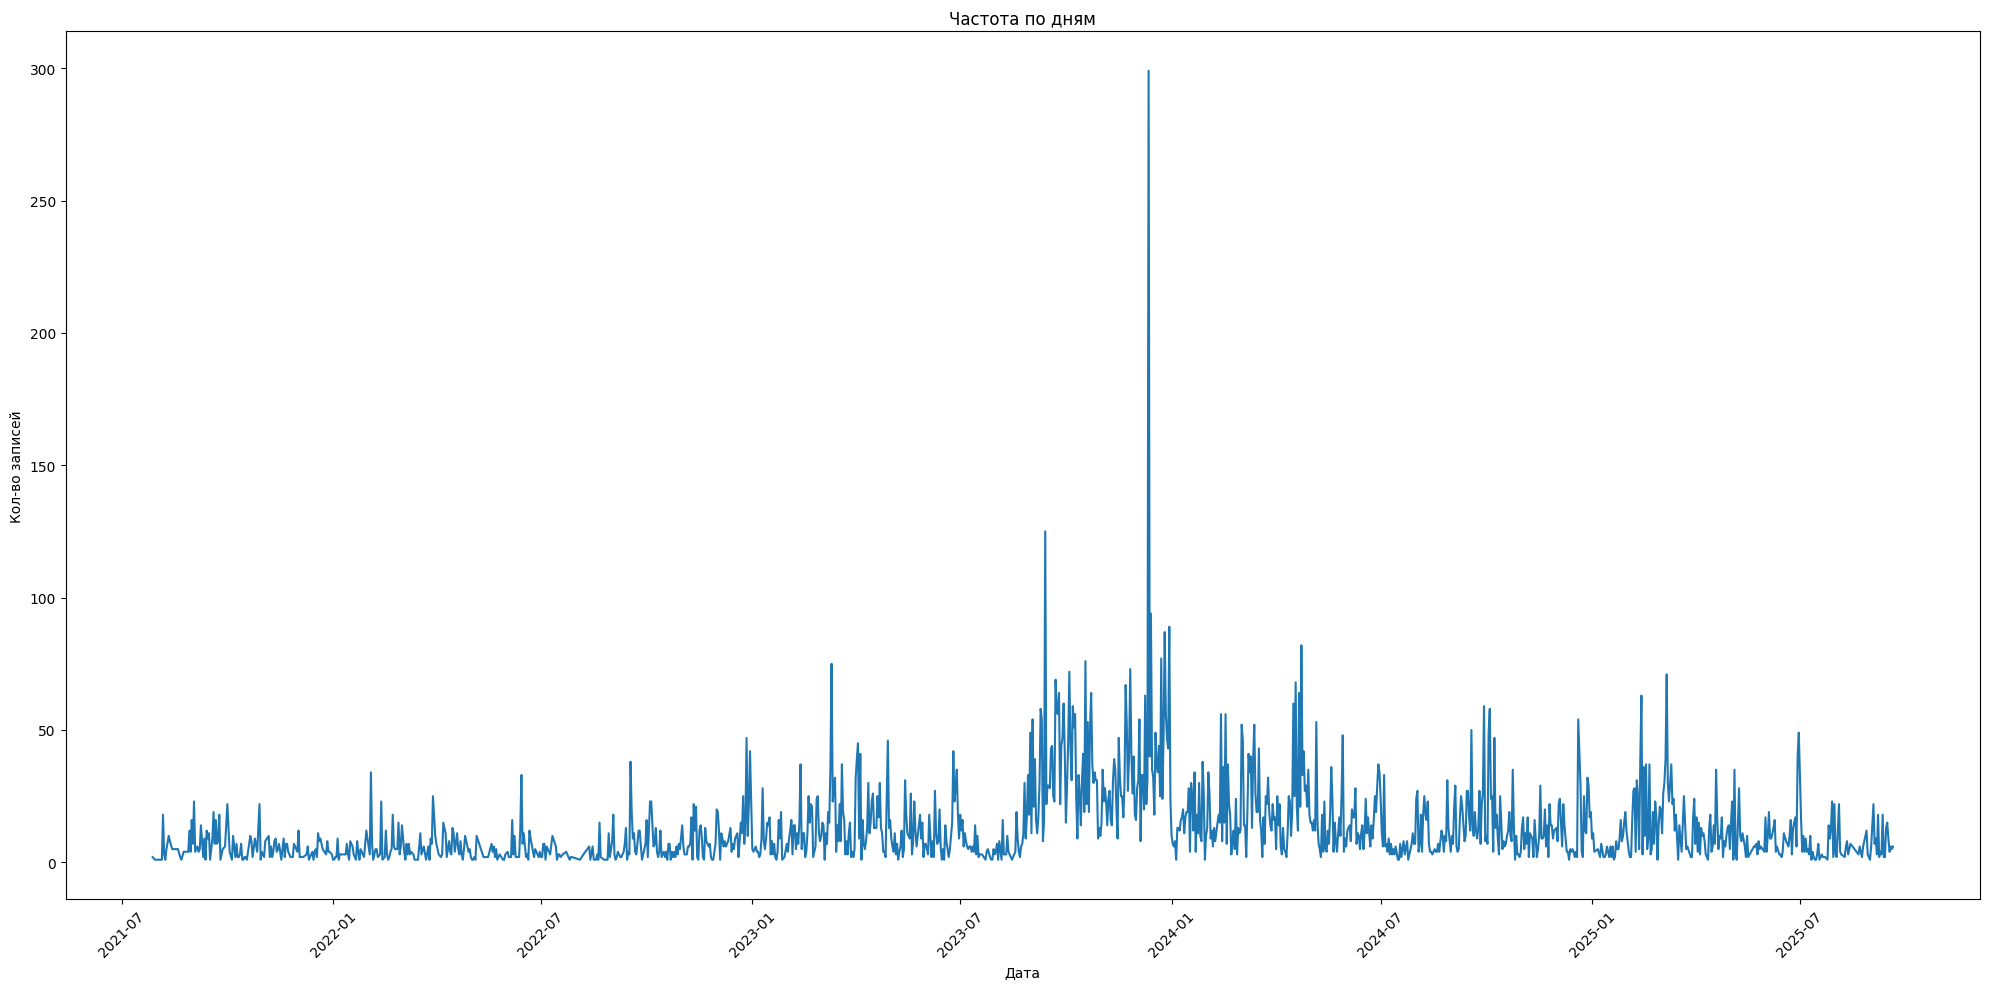

In [185]:
plt.figure(figsize=(20, 10))
sns.lineplot(x="day", y="count", data=day_series)
plt.title("Частота по дням")
plt.xlabel("Дата")
plt.ylabel("Кол-во записей")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='day', ylabel='smoothed'>

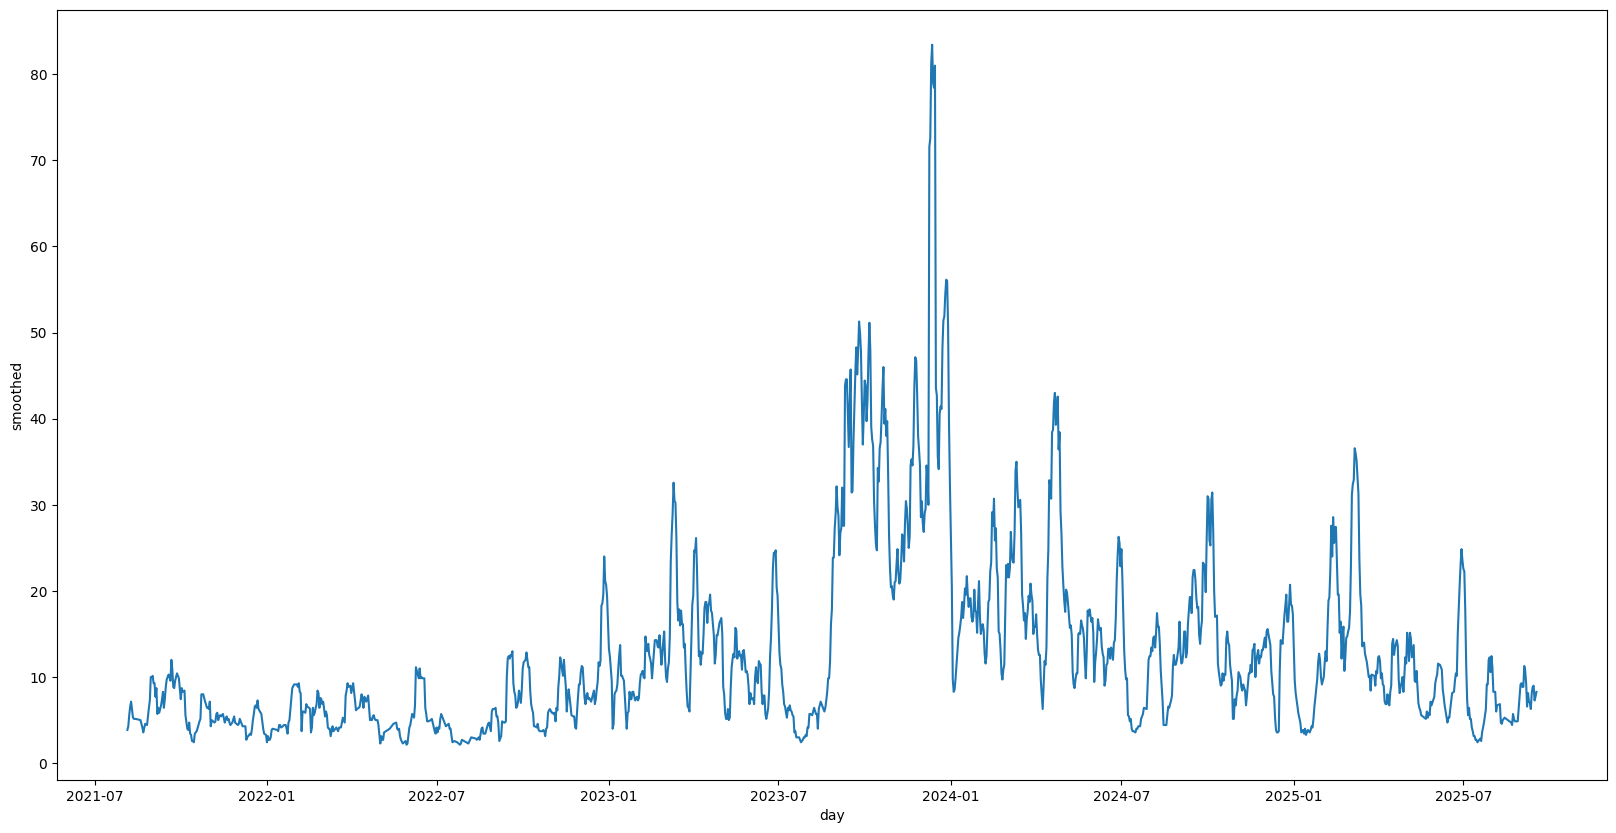

In [186]:
plt.figure(figsize=(20, 10))
day_series["smoothed"] = day_series["count"].rolling(window=7, center=True).mean()
sns.lineplot(x="day", y="smoothed", data=day_series)

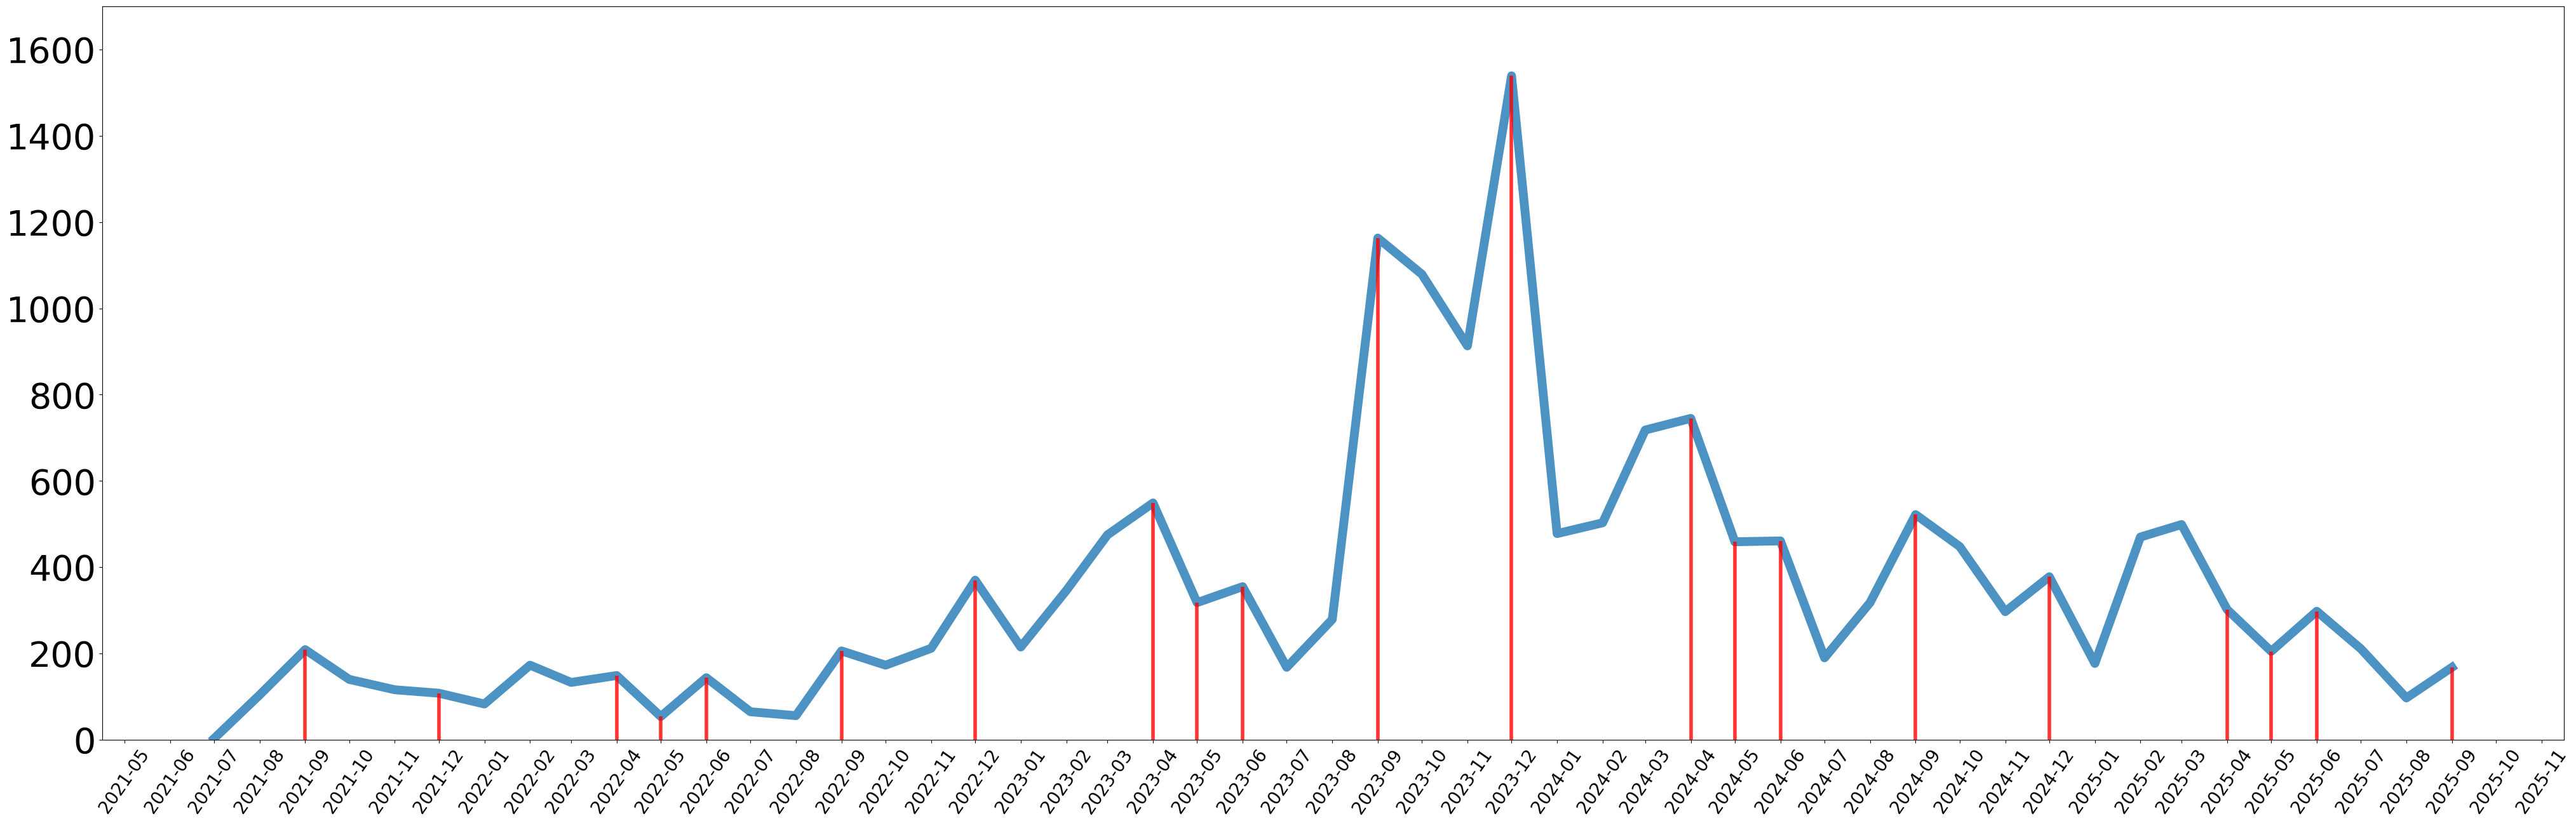

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(50, 15))
plt.ylim((0, 1700))
sns.lineplot(x="month", y="count", data=month_series, alpha=0.8, linewidth=10)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
highlight_months = [12,7, 5, 9, 6]

for _, row in month_series.iterrows():
    month_number = row["month"].month
    if month_number in highlight_months:
        plt.vlines(x=row["month"], ymin=0, ymax=row["count"], color='red', alpha=0.8, linewidth=4)

plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=55, fontsize=20)
plt.yticks(fontsize=40)

plt.show()

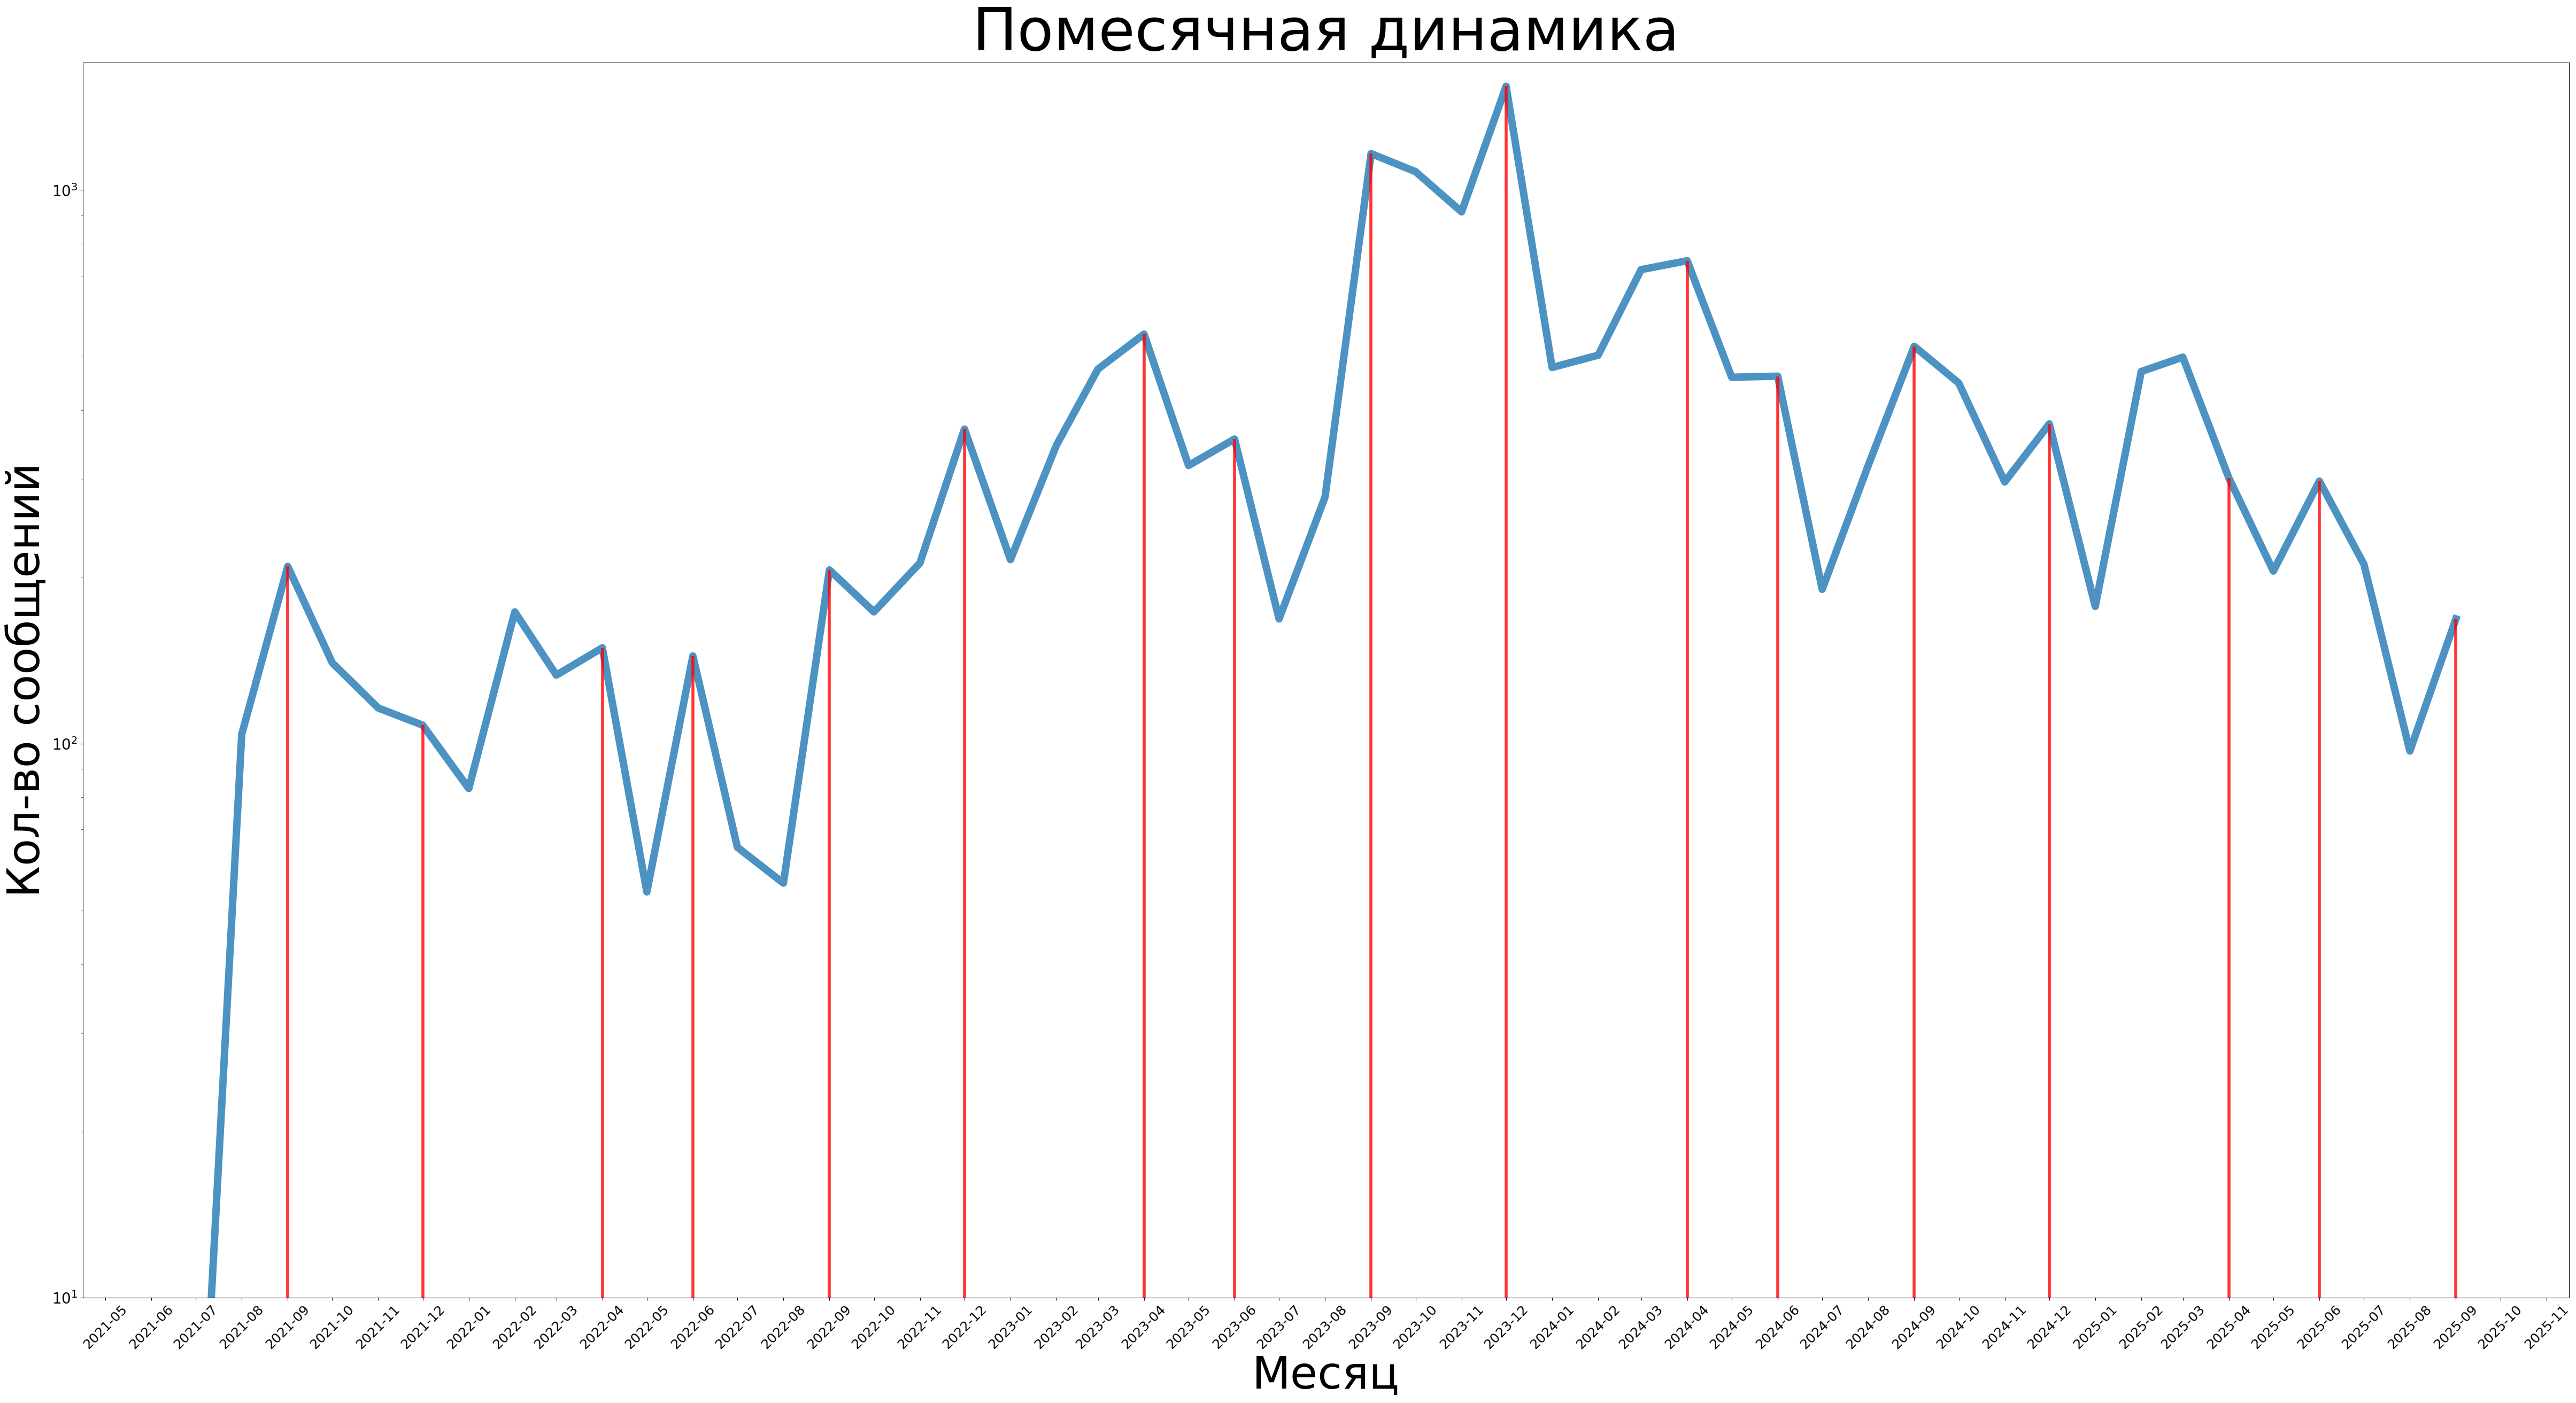

In [216]:

import matplotlib.dates as mdates

plt.figure(figsize=(60, 30))
plt.ylim((10, 1700))
sns.lineplot(x="month", y="count", data=month_series, alpha=0.8, linewidth=10)
plt.yscale("log")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
highlight_months = [12, 4, 9, 6]

for _, row in month_series.iterrows():
    month_number = row["month"].month
    if month_number in highlight_months:
        plt.vlines(x=row["month"], ymin=0, ymax=row["count"], color='red', alpha=0.8, linewidth=4)

plt.title("Помесячная динамика", fontsize=80)
plt.xlabel("Месяц", fontsize=60)
plt.ylabel("Кол-во сообщений", fontsize=60)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=20)

plt.show()


In [ ]:

import matplotlib.dates as mdates

plt.figure(figsize=(60, 30))
plt.ylim((10, 1700))
sns.lineplot(x="month", y="count", data=month_series, alpha=0.8, linewidth=10)
plt.yscale("log")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
highlight_months = [12, 4, 9, 6]

for _, row in month_series.iterrows():
    month_number = row["month"].month
    if month_number in highlight_months:
        plt.vlines(x=row["month"], ymin=0, ymax=row["count"], color='red', alpha=0.8, linewidth=4)

plt.title("Помесячная динамика", fontsize=80)
plt.xlabel("Месяц", fontsize=60)
plt.ylabel("Кол-во сообщений", fontsize=60)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=20)

plt.show()